<a href="https://colab.research.google.com/github/sarthak15sharma/panic-disorder-detection/blob/main/Model_Training_and_Testing_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Basic Libraries

In [ ]:
import pandas as pd #For reading the dataset
import numpy as np #For array manipulation
import matplotlib.pyplot as plt #For plotting graphs
import warnings
warnings.filterwarnings("ignore")  #This is done to ignore the warnings
import seaborn as sns #Visualization
from collections import Counter #For balancing the dataset
from sklearn.feature_selection import chi2 #For feature selection based on chi^2 test
from sklearn.linear_model import LogisticRegression # For training on different models
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #For evaluation metrics
from sklearn.model_selection import train_test_split, GridSearchCV #For hyperparameter tuning

# Read the Datasets

In [ ]:
train=pd.read_csv('panic_disorder_dataset_training.csv')
train.head() #print the first 5 rows of the training dataset

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,NaN,Socializing,High,Sleep quality,0
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,NaN,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,NaN,NaN,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,NaN,Drugs,Seeking therapy,Low,Sleep quality,0


In [ ]:
test=pd.read_csv('panic_disorder_dataset_testing.csv')
test.head() #print the first 5 rows of the training dataset

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,41,Male,Yes,No,High,Shortness of breath,Mild,Mild,Urban,Diabetes,Bipolar disorder,Alcohol,Seeking therapy,Low,Exercise,0
1,2,20,Female,Yes,No,Low,Shortness of breath,Mild,Significant,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Diet,0
2,3,32,Male,Yes,Yes,High,Panic attacks,Severe,Mild,Rural,Heart disease,Bipolar disorder,Drugs,Meditation,Moderate,Exercise,0
3,4,41,Female,Yes,Yes,Moderate,Shortness of breath,Moderate,Significant,Urban,Heart disease,Anxiety disorder,NaN,Exercise,High,Sleep quality,0
4,5,36,Female,Yes,No,High,Chest pain,Severe,Significant,Rural,Asthma,Depressive disorder,NaN,Seeking therapy,Low,Exercise,0


# Handling missing values

In [ ]:
print('Train data shape:',train.shape) #1 lakh rows and 17 columns in the training dataset

Train data shape: (100000, 17)


In [ ]:
print('Train data shape:',train.shape) #1 lakh rows and 17 columns in the training dataset

Train data shape: (100000, 17)


In [ ]:
train.info() #Medical History, Psychiatric History, Substance Use contains null values training dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Participant ID            100000 non-null  int64 
 1   Age                       100000 non-null  int64 
 2   Gender                    100000 non-null  object
 3   Family History            100000 non-null  object
 4   Personal History          100000 non-null  object
 5   Current Stressors         100000 non-null  object
 6   Symptoms                  100000 non-null  object
 7   Severity                  100000 non-null  object
 8   Impact on Life            100000 non-null  object
 9   Demographics              100000 non-null  object
 10  Medical History           74827 non-null   object
 11  Psychiatric History       75079 non-null   object
 12  Substance Use             66626 non-null   object
 13  Coping Mechanisms         100000 non-null  object
 14  Socia

In [ ]:
test.info() #Medical History, Psychiatric History, Substance Use contains null values in test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Participant ID            20000 non-null  int64 
 1   Age                       20000 non-null  int64 
 2   Gender                    20000 non-null  object
 3   Family History            20000 non-null  object
 4   Personal History          20000 non-null  object
 5   Current Stressors         20000 non-null  object
 6   Symptoms                  20000 non-null  object
 7   Severity                  20000 non-null  object
 8   Impact on Life            20000 non-null  object
 9   Demographics              20000 non-null  object
 10  Medical History           14999 non-null  object
 11  Psychiatric History       15011 non-null  object
 12  Substance Use             13383 non-null  object
 13  Coping Mechanisms         20000 non-null  object
 14  Social Support        

In [ ]:
train.isnull().sum() #Determining the number of null values in each of {Medical History, Psychiatric History, Substance} in training dataset

,0
Participant ID,0
Age,0
Gender,0
Family History,0
Personal History,0
Current Stressors,0
Symptoms,0
Severity,0
Impact on Life,0
Demographics,0


In [ ]:
test.isnull().sum() #Determining the number of null values in each of {Medical History, Psychiatric History, Substance} in testing dataset

,0
Participant ID,0
Age,0
Gender,0
Family History,0
Personal History,0
Current Stressors,0
Symptoms,0
Severity,0
Impact on Life,0
Demographics,0


In [ ]:
train.replace('None', pd.NA, inplace=True)
train['Medical History'].fillna('No Medical History', inplace=True)
train['Psychiatric History'].fillna('No Psychiatric History', inplace=True)
train['Substance Use'].fillna('No Substance Use', inplace=True)

In [ ]:
train.isnull().sum()

,0
Participant ID,0
Age,0
Gender,0
Family History,0
Personal History,0
Current Stressors,0
Symptoms,0
Severity,0
Impact on Life,0
Demographics,0


In [ ]:
test.replace('None', pd.NA, inplace=True)
test['Medical History'].fillna('No Medical History', inplace=True)
test['Psychiatric History'].fillna('No Psychiatric History', inplace=True)
test['Substance Use'].fillna('No Substance Use', inplace=True)

In [ ]:
test.isnull().sum()

,0
Participant ID,0
Age,0
Gender,0
Family History,0
Personal History,0
Current Stressors,0
Symptoms,0
Severity,0
Impact on Life,0
Demographics,0


# Exploratory Analysis

### Visual Analysis

In [ ]:
train.describe(include='all')

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
count,100000.000000,100000.000000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000.00000
unique,NaN,NaN,2,2,2,3,5,3,3,2,4,4,3,4,3,3,NaN
top,NaN,NaN,Male,Yes,No,Low,Fear of losing control,Severe,Mild,Rural,No Medical History,Bipolar disorder,Alcohol,Socializing,High,Exercise,NaN
freq,NaN,NaN,50052,50042,50210,33409,20236,33510,33452,50087,25173,25058,33445,25197,33453,33597,NaN
mean,50000.500000,41.454300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04285
std,28867.657797,13.839204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20252
min,1.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
25%,25000.750000,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
50%,50000.500000,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
75%,75000.250000,53.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000


In [ ]:
test.describe(include='all')

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
count,20000.000000,20000.000000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000.000000
unique,NaN,NaN,2,2,2,3,5,3,3,2,4,4,3,4,3,3,NaN
top,NaN,NaN,Female,No,Yes,Low,Chest pain,Moderate,Significant,Urban,Heart disease,Depressive disorder,Drugs,Socializing,Low,Sleep quality,NaN
freq,NaN,NaN,10044,10043,10027,6708,4087,6718,6873,10081,5010,5033,6702,5132,6687,6770,NaN
mean,10000.500000,41.489250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042050
std,5773.647028,13.887773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200708
min,1.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,5000.750000,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,10000.500000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,15000.250000,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


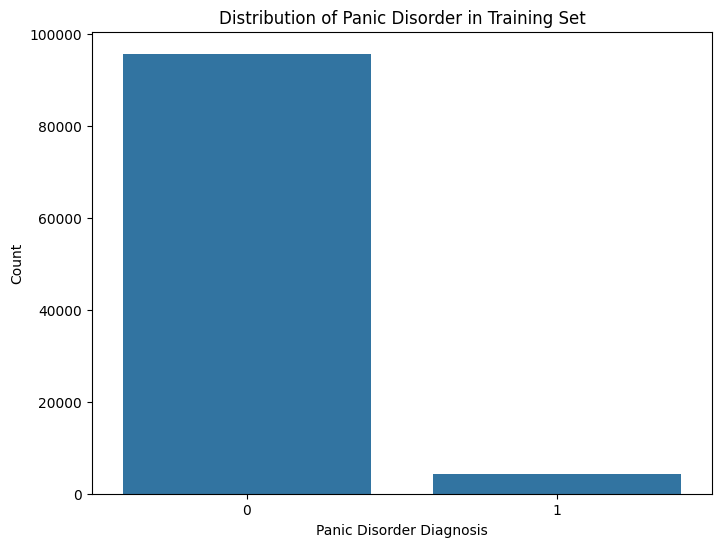

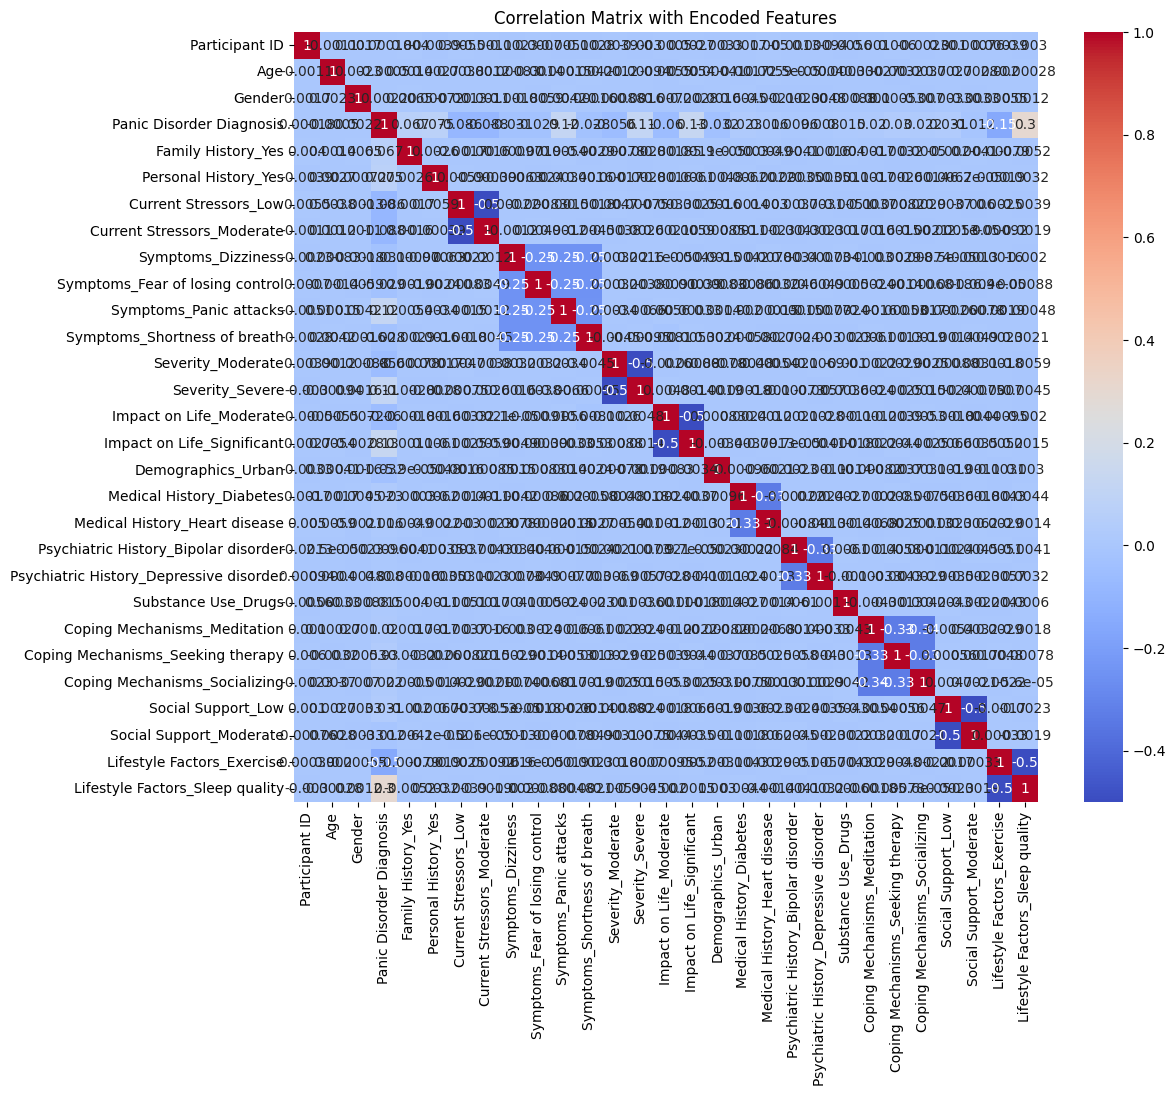

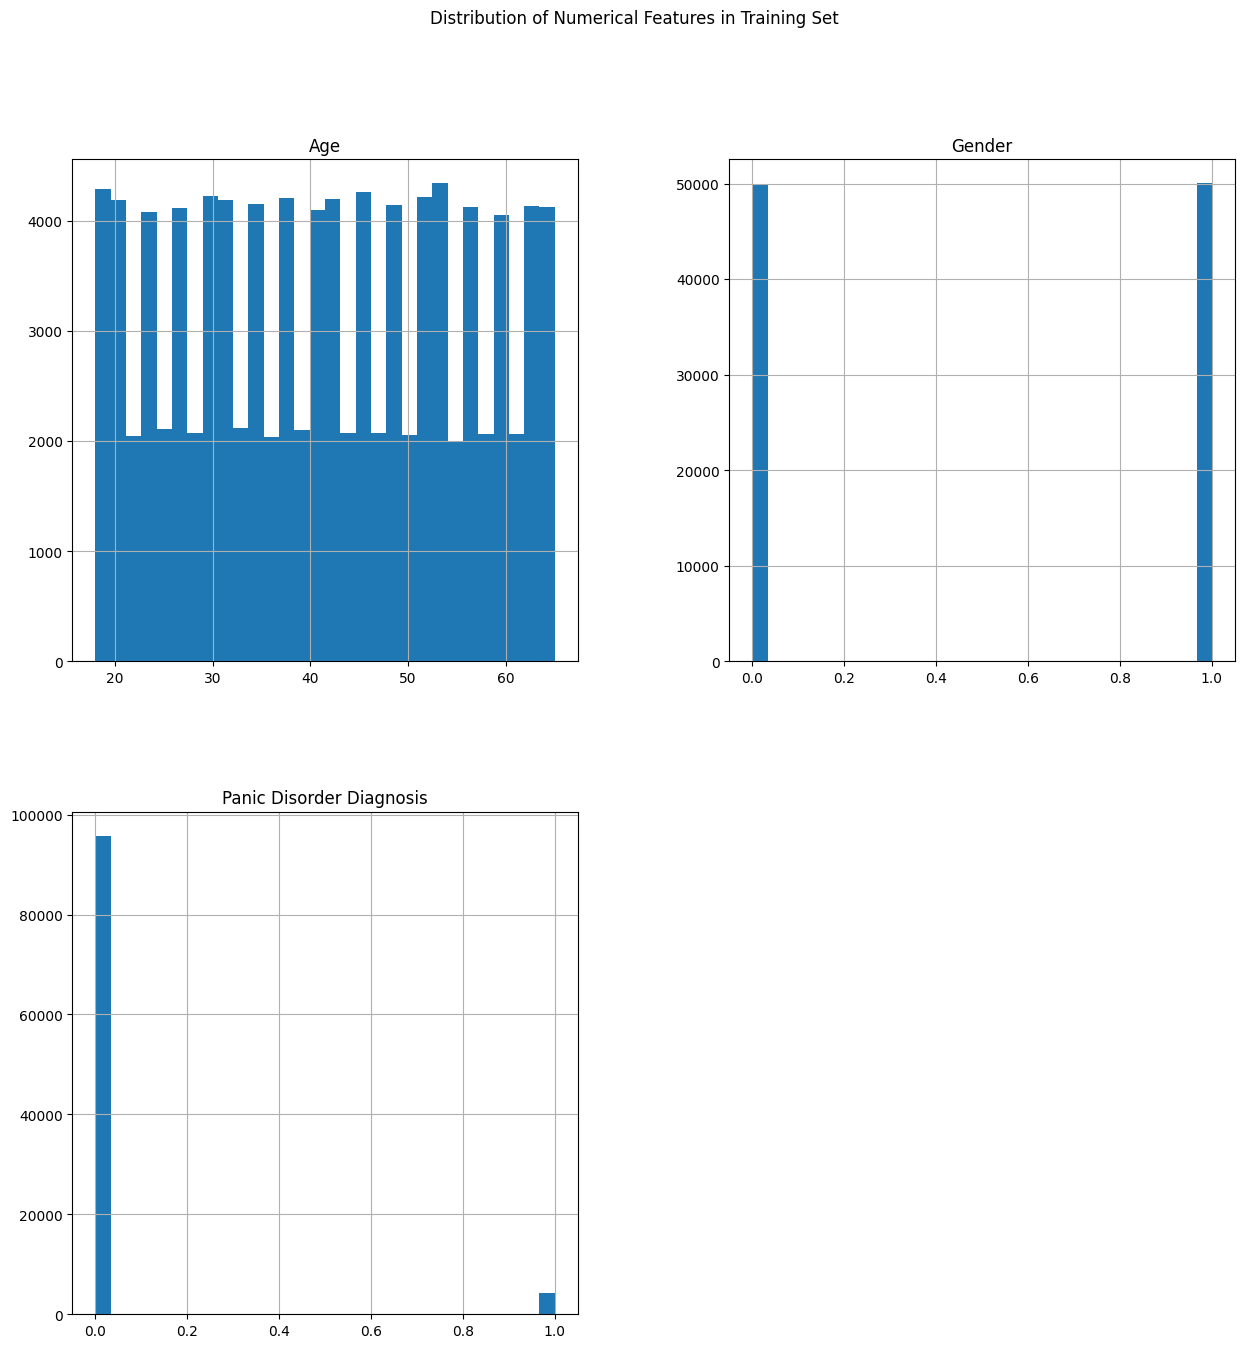

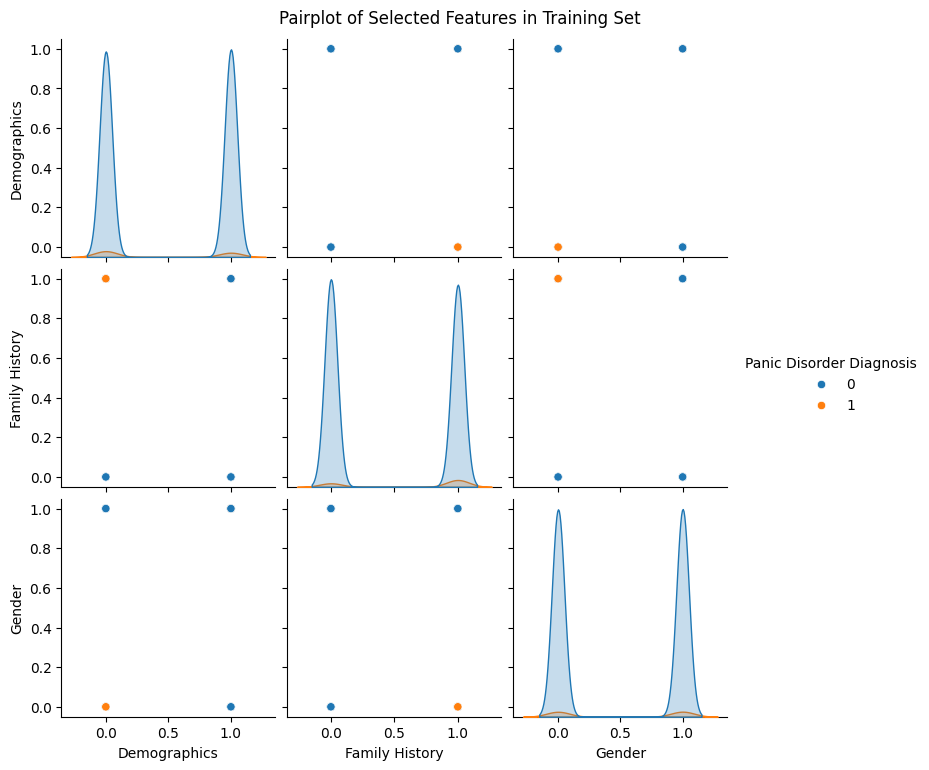

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Panic Disorder Diagnosis', data=train)
plt.title('Distribution of Panic Disorder in Training Set')
plt.xlabel('Panic Disorder Diagnosis')
plt.ylabel('Count')
plt.show()

# Visualize the correlation matrix in the training set

# Encode categorical columns using one-hot encoding
encoded_train = pd.get_dummies(train, drop_first=True)
correlation_matrix = encoded_train.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Encoded Features')
plt.show()



# Visualize the distribution of numerical features in the training set
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns.difference(['Participant ID'])
train[numerical_features].hist(bins=30, figsize=(15, 15))
plt.suptitle('Distribution of Numerical Features in Training Set')
plt.show()

# Visualize relationships between features in the training set using pairplot
# Using the selected features for the pairplot
# Encode categorical features using LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for feature in ['Gender', 'Demographics', 'Family History']:
    train[feature] = label_encoder.fit_transform(train[feature])

# Create the pairplot again
selected_features = ['Coping Mechanisms', 'Current Stressors', 'Demographics', 'Family History',
                     'Gender', 'Impact on Life', 'Symptoms']
sns.pairplot(train[selected_features + ['Panic Disorder Diagnosis']], hue='Panic Disorder Diagnosis')
plt.suptitle('Pairplot of Selected Features in Training Set', y=1.02)
plt.show()


### Univariate Analysis

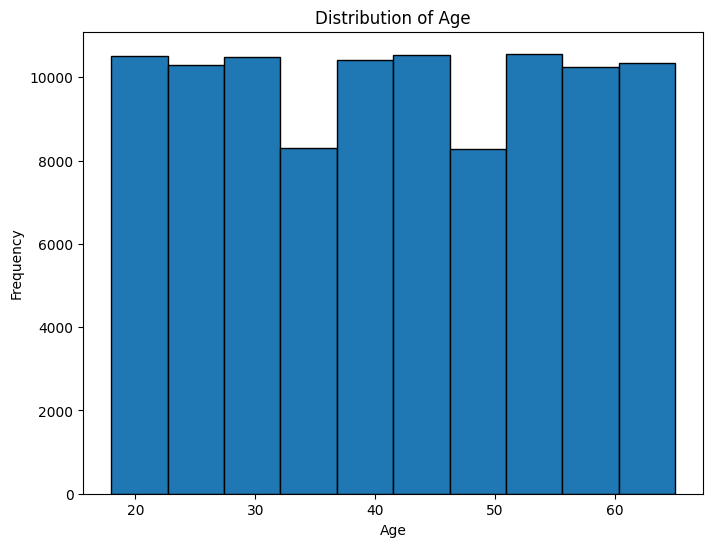

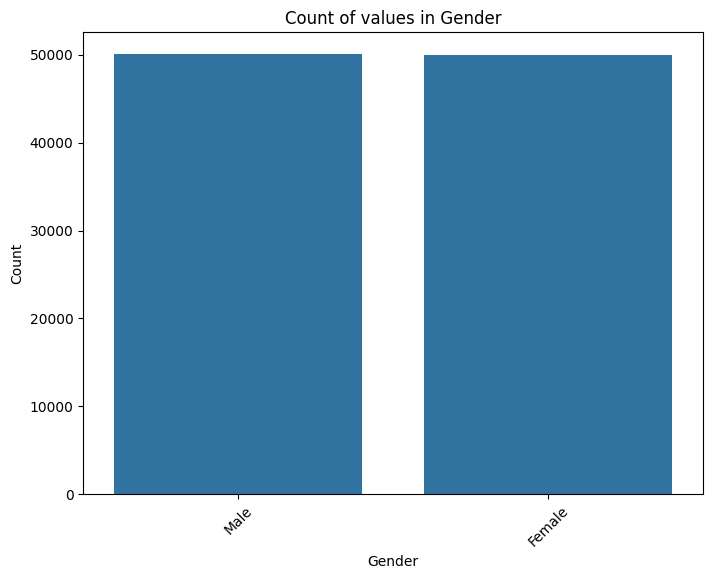

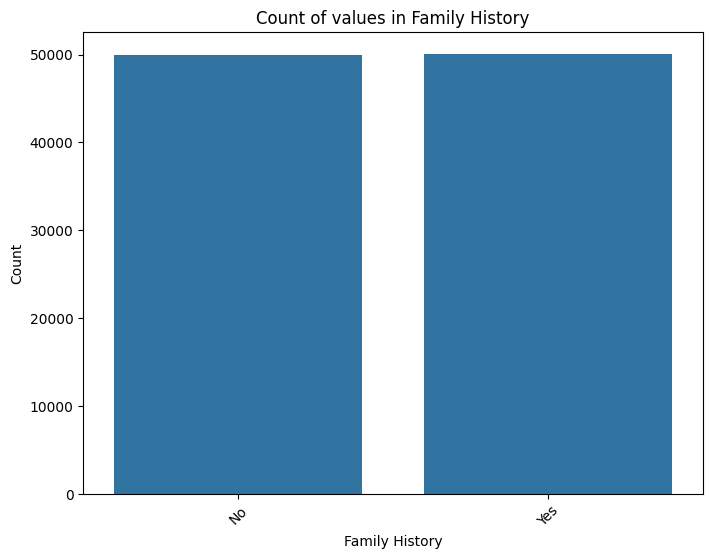

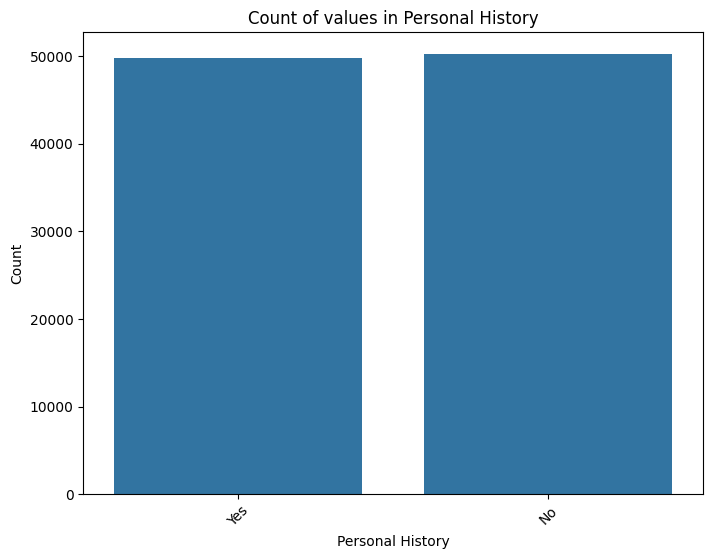

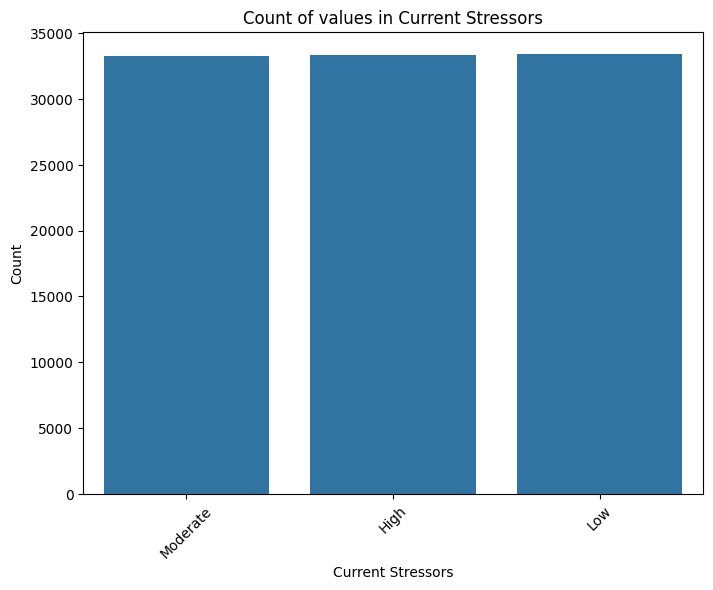

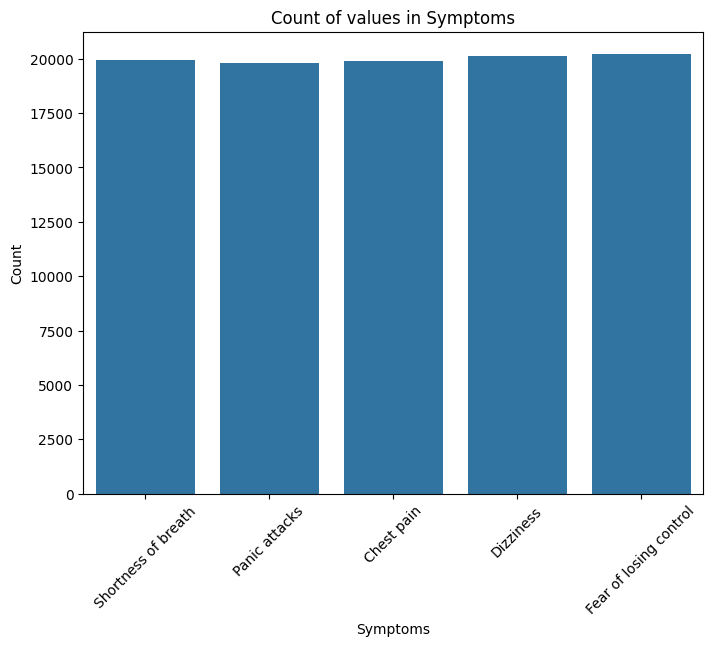

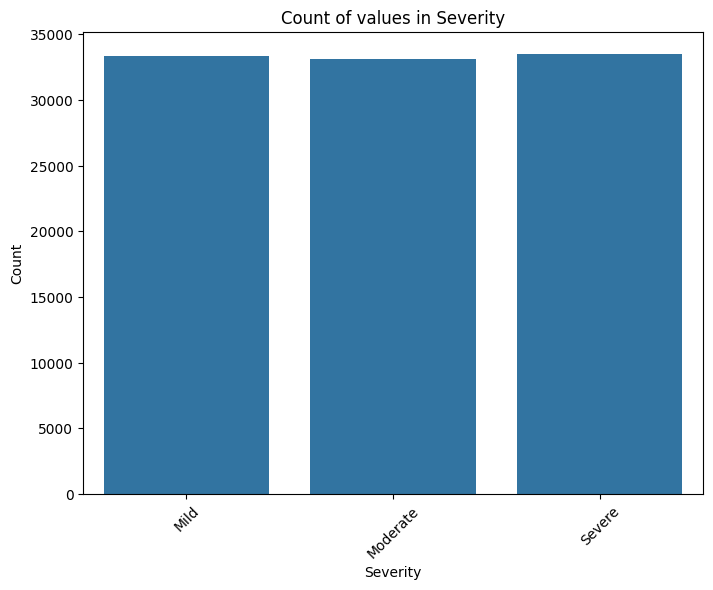

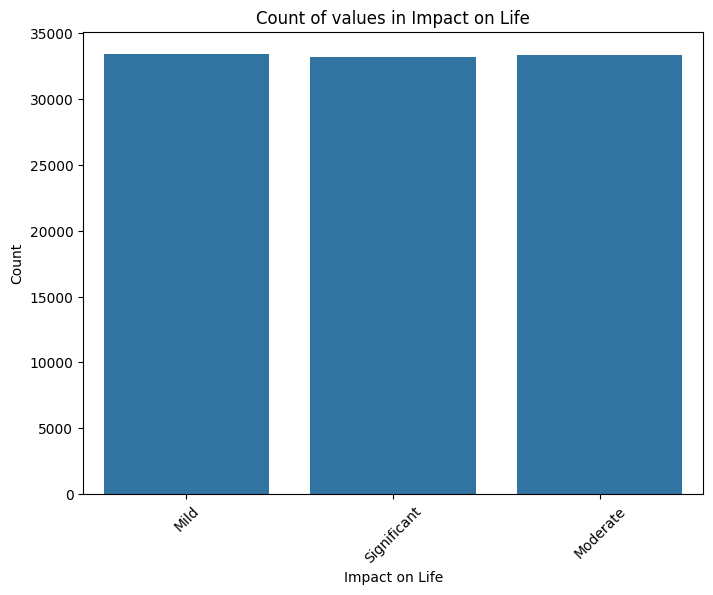

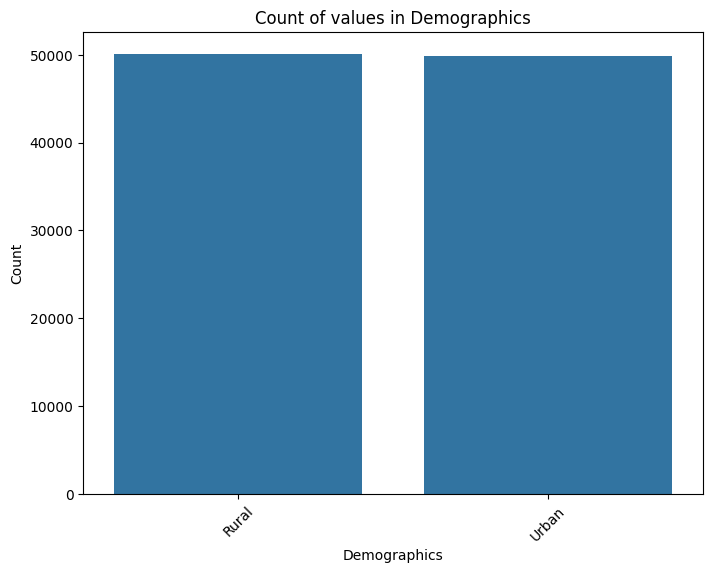

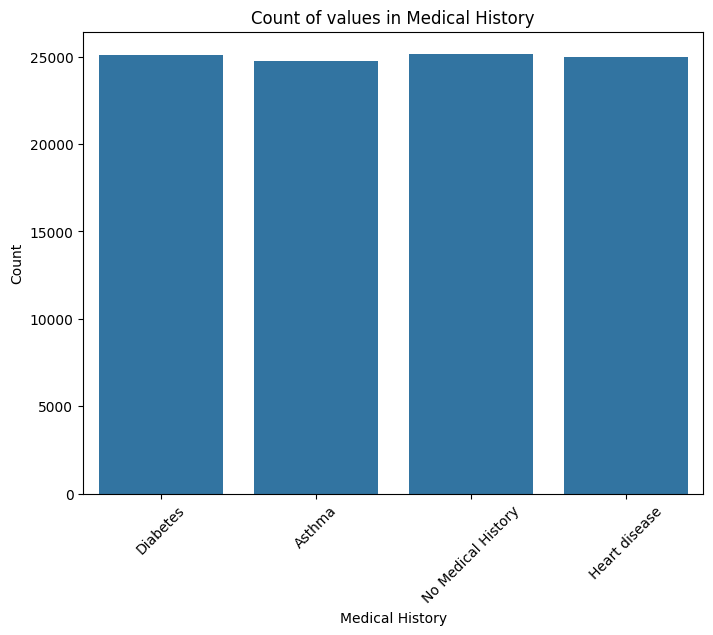

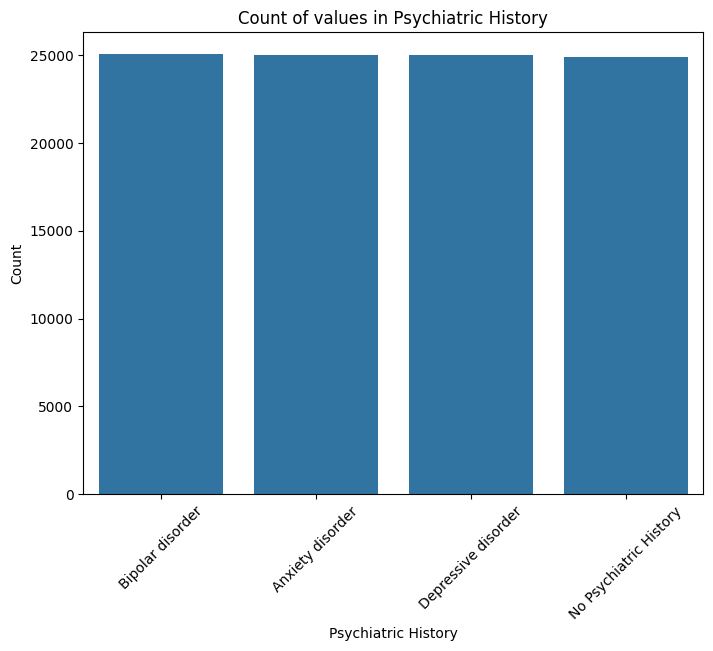

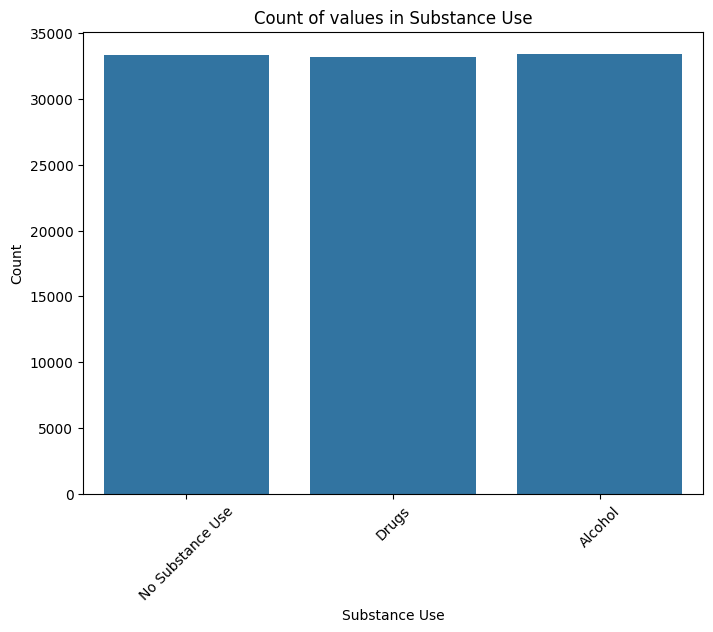

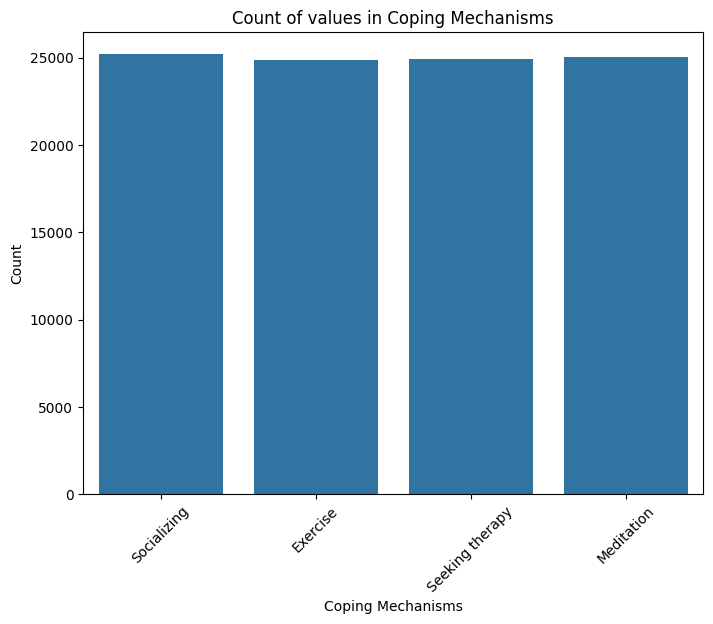

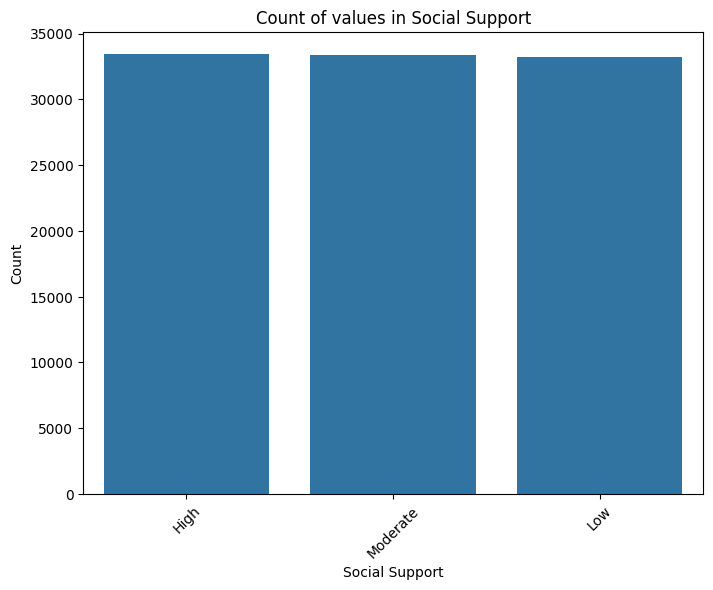

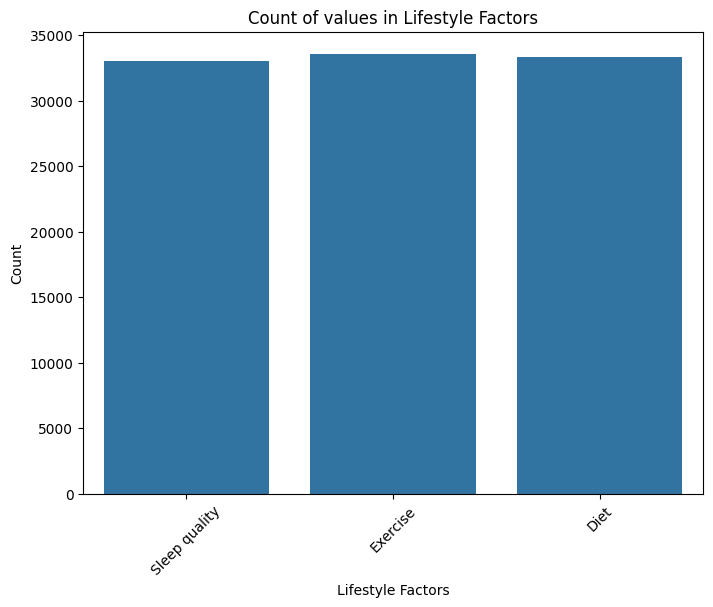

In [ ]:
numerical_features = ['Age']  # Add more numerical features if needed
cat_cols = ['Gender', 'Family History', 'Personal History', 'Current Stressors',
            'Symptoms', 'Severity', 'Impact on Life', 'Demographics',
            'Medical History', 'Psychiatric History', 'Substance Use',
            'Coping Mechanisms', 'Social Support', 'Lifestyle Factors']  # Define your categorical columns

# Univariate analysis for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(train[feature], bins=10, edgecolor="black")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# Univariate analysis for categorical features
for feature in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=train)
    plt.title(f"Count of values in {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

### Bivariate Analysis

<Figure size 800x600 with 0 Axes>

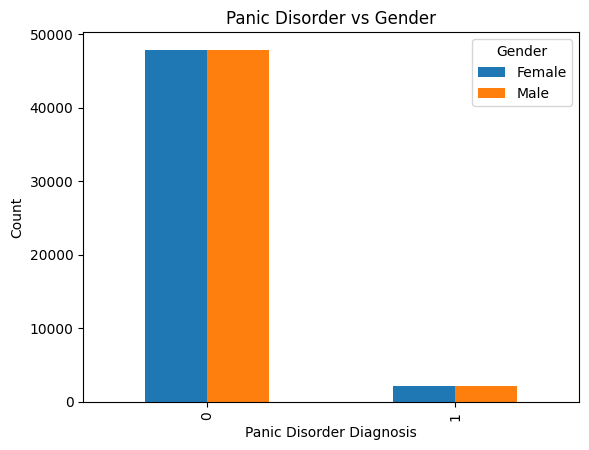

<Figure size 800x600 with 0 Axes>

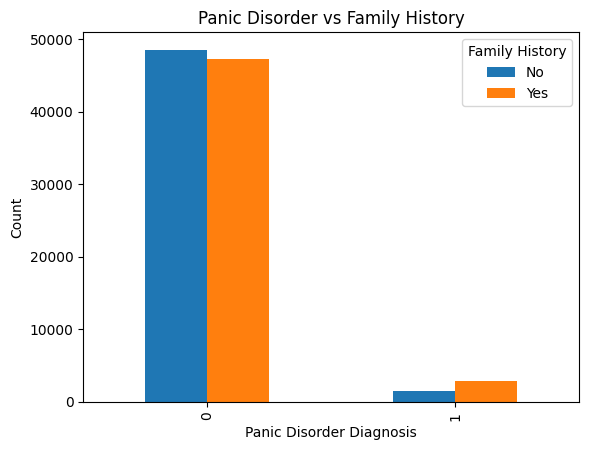

<Figure size 800x600 with 0 Axes>

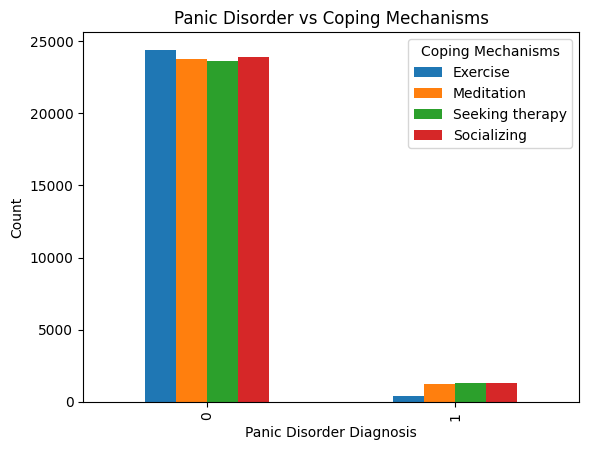

<Figure size 800x600 with 0 Axes>

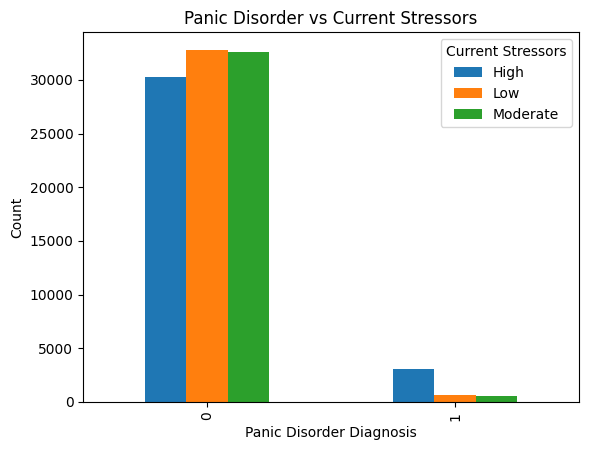

<Figure size 800x600 with 0 Axes>

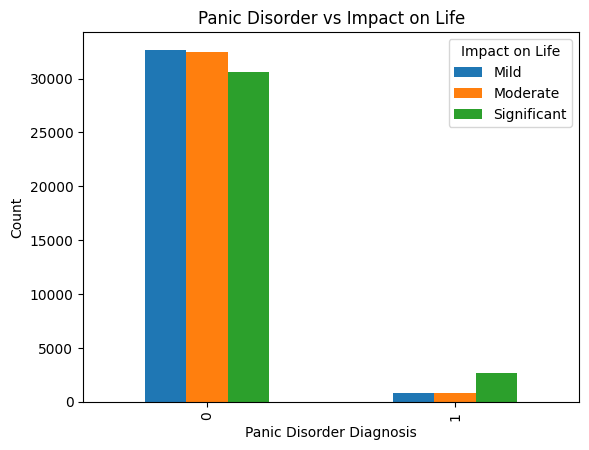

In [ ]:
# Analyze the relationship between Panic Disorder and Gender
plt.figure(figsize=(8, 6))
pd.crosstab(train['Panic Disorder Diagnosis'], train['Gender']).plot(kind='bar')
plt.title('Panic Disorder vs Gender')
plt.xlabel('Panic Disorder Diagnosis')
plt.ylabel('Count')
plt.show()

# Analyze the relationship between Panic Disorder and Family History
plt.figure(figsize=(8, 6))
pd.crosstab(train['Panic Disorder Diagnosis'], train['Family History']).plot(kind='bar')
plt.title('Panic Disorder vs Family History')
plt.xlabel('Panic Disorder Diagnosis')
plt.ylabel('Count')
plt.show()

# Analyze the relationship between Panic Disorder and Coping Mechanisms
plt.figure(figsize=(8, 6))
pd.crosstab(train['Panic Disorder Diagnosis'], train['Coping Mechanisms']).plot(kind='bar')
plt.title('Panic Disorder vs Coping Mechanisms')
plt.xlabel('Panic Disorder Diagnosis')
plt.ylabel('Count')
plt.show()

# Analyze the relationship between Panic Disorder and Current Stressors
plt.figure(figsize=(8, 6))
pd.crosstab(train['Panic Disorder Diagnosis'], train['Current Stressors']).plot(kind='bar')
plt.title('Panic Disorder vs Current Stressors')
plt.xlabel('Panic Disorder Diagnosis')
plt.ylabel('Count')
plt.show()

# Analyze the relationship between Panic Disorder and Impact on Life
plt.figure(figsize=(8, 6))
pd.crosstab(train['Panic Disorder Diagnosis'], train['Impact on Life']).plot(kind='bar')
plt.title('Panic Disorder vs Impact on Life')
plt.xlabel('Panic Disorder Diagnosis')
plt.ylabel('Count')
plt.show()

# Label encoding for categorical features

In [ ]:
print(train.head())

   Participant ID  Age  Gender Family History Personal History  \
0               1   38    Male             No              Yes   
1               2   51    Male             No               No   
2               3   32  Female            Yes               No   
3               4   64  Female             No               No   
4               5   31    Male            Yes               No   

  Current Stressors             Symptoms  Severity Impact on Life  \
0          Moderate  Shortness of breath      Mild           Mild   
1              High        Panic attacks      Mild           Mild   
2              High        Panic attacks      Mild    Significant   
3          Moderate           Chest pain  Moderate       Moderate   
4          Moderate        Panic attacks      Mild       Moderate   

  Demographics Medical History     Psychiatric History     Substance Use  \
0        Rural        Diabetes        Bipolar disorder  No Substance Use   
1        Urban          Asthma      

In [ ]:
le = {}
for column in train.columns:
    if train[column].dtype=='object':
        le[column] = {}
        c = 0
        for i in train[column].unique():
            le[column][i] = c
            c += 1
        train[column] = train[column].map(le[column])
le = {}
for column in test.columns:
  if test[column].dtype == object:
    le[column] = {}
    c = 0
    for i in test[column].unique():
      le[column][i] = c
      c += 1
    test[column] = test[column].map(le[column])

In [ ]:
print(train.head())

   Participant ID  Age  Gender  Family History Personal History  \
0               1   38       1               0              Yes   
1               2   51       1               0               No   
2               3   32       0               1               No   
3               4   64       0               0               No   
4               5   31       1               1               No   

  Current Stressors             Symptoms  Severity Impact on Life  \
0          Moderate  Shortness of breath      Mild           Mild   
1              High        Panic attacks      Mild           Mild   
2              High        Panic attacks      Mild    Significant   
3          Moderate           Chest pain  Moderate       Moderate   
4          Moderate        Panic attacks      Mild       Moderate   

   Demographics Medical History  Psychiatric History Substance Use  \
0             0        Diabetes     Bipolar disorder           NaN   
1             1          Asthma     Anxiet

In [ ]:
print(test.head())

   Participant ID  Age  Gender Family History Personal History  \
0               1   41    Male            Yes               No   
1               2   20  Female            Yes               No   
2               3   32    Male            Yes              Yes   
3               4   41  Female            Yes              Yes   
4               5   36  Female            Yes               No   

  Current Stressors             Symptoms  Severity Impact on Life  \
0              High  Shortness of breath      Mild           Mild   
1               Low  Shortness of breath      Mild    Significant   
2              High        Panic attacks    Severe           Mild   
3          Moderate  Shortness of breath  Moderate    Significant   
4              High           Chest pain    Severe    Significant   

  Demographics Medical History  Psychiatric History Substance Use  \
0        Urban        Diabetes     Bipolar disorder       Alcohol   
1        Urban          Asthma     Anxiety disorde

# Define features and labels

In [23]:

x_train=train.iloc[:,1:-1] #Dependent variables of the training dataset
y_train=train.iloc[:,-1] #Independent variables of the training dataset
x_test=test.iloc[:,1:-1] #Dependent variables of the testing dataset
y_test=test.iloc[:,-1] #Independent variables of the testing dataset

In [24]:
print(x_train.shape, y_train.shape)

(100000, 15) (100000,)


In [25]:
print(x_train.head())

   Age  Gender  Family History Personal History Current Stressors  \
0   38       1               0              Yes          Moderate   
1   51       1               0               No              High   
2   32       0               1               No              High   
3   64       0               0               No          Moderate   
4   31       1               1               No          Moderate   

              Symptoms  Severity Impact on Life  Demographics Medical History  \
0  Shortness of breath      Mild           Mild             0        Diabetes   
1        Panic attacks      Mild           Mild             1          Asthma   
2        Panic attacks      Mild    Significant             1        Diabetes   
3           Chest pain  Moderate       Moderate             0        Diabetes   
4        Panic attacks      Mild       Moderate             0          Asthma   

   Psychiatric History Substance Use Coping Mechanisms Social Support  \
0     Bipolar disorder   

In [26]:
print(y_train.head())

0    0
1    0
2    0
3    0
4    0
Name: Panic Disorder Diagnosis, dtype: int64


In [27]:
print(x_test.head())

   Age  Gender Family History Personal History Current Stressors  \
0   41    Male            Yes               No              High   
1   20  Female            Yes               No               Low   
2   32    Male            Yes              Yes              High   
3   41  Female            Yes              Yes          Moderate   
4   36  Female            Yes               No              High   

              Symptoms  Severity Impact on Life Demographics Medical History  \
0  Shortness of breath      Mild           Mild        Urban        Diabetes   
1  Shortness of breath      Mild    Significant        Urban          Asthma   
2        Panic attacks    Severe           Mild        Rural   Heart disease   
3  Shortness of breath  Moderate    Significant        Urban   Heart disease   
4           Chest pain    Severe    Significant        Rural          Asthma   

   Psychiatric History Substance Use Coping Mechanisms Social Support  \
0     Bipolar disorder       Alcohol 

In [28]:
print(y_test.head())

0    0
1    0
2    0
3    0
4    0
Name: Panic Disorder Diagnosis, dtype: int64


# Undersampling

In [29]:
class_0_indices = x_train[y_train == 0].index #negative class
class_1_indices = x_train[y_train == 1].index #positive class

undersample_indices = np.random.choice(class_0_indices, size=class_1_indices.shape[0], replace=False)

x_train_undersampled = pd.concat([x_train.loc[undersample_indices], x_train.loc[class_1_indices]])
y_train_undersampled = pd.concat([y_train.loc[undersample_indices], y_train.loc[class_1_indices]])

# Print before and after balancing
print("Before balancing", Counter(y_train))
print("After balancing", Counter(y_train_undersampled))


Before balancing Counter({0: 95715, 1: 4285})
After balancing Counter({0: 4285, 1: 4285})


In [30]:
# Display shapes of datasets
print(x_train.shape, y_train.shape)
print(x_train_undersampled.shape, y_train_undersampled.shape)


(100000, 15) (100000,)
(8570, 15) (8570,)


In [31]:
# Display first few rows of balanced data
print(x_train_undersampled.head())
print(y_train_undersampled.head())

       Age  Gender  Family History Personal History Current Stressors  \
55554   64       0               0              Yes          Moderate   
86042   33       0               1               No          Moderate   
62056   21       1               0               No              High   
54760   29       1               0              Yes          Moderate   
50955   47       1               0               No               Low   

                  Symptoms  Severity Impact on Life  Demographics  \
55554  Shortness of breath  Moderate       Moderate             1   
86042           Chest pain  Moderate       Moderate             0   
62056        Panic attacks      Mild    Significant             1   
54760  Shortness of breath    Severe           Mild             1   
50955  Shortness of breath  Moderate           Mild             1   

      Medical History  Psychiatric History Substance Use Coping Mechanisms  \
55554          Asthma     Anxiety disorder           NaN        Medi

In [32]:
print(x_test.shape)
print(y_test.shape)

(20000, 15)
(20000,)


# Feature Selection based on chi^2 test

In [35]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode all categorical features in x_train_undersampled
for column in x_train_undersampled.columns:
    if x_train_undersampled[column].dtype == 'object':  # Check if the column is categorical
        x_train_undersampled[column] = label_encoder.fit_transform(x_train_undersampled[column])
        x_test[column] = label_encoder.transform(x_test[column])

# Perform Chi-Square test on encoded data
f_p_values = chi2(x_train_undersampled, y_train_undersampled)
p_values = pd.Series(f_p_values[1], index=x_train_undersampled.columns)
p_values.sort_values(ascending=True, inplace=True)
print(p_values)


selected_features = [
    'Lifestyle Factors', 'Current Stressors', 'Impact on Life', 'Severity',
    'Personal History', 'Coping Mechanisms', 'Symptoms', 'Family History',
    'Medical History', 'Psychiatric History', 'Demographics', 'Substance Use'
]

x_train_selected = x_train_undersampled[selected_features]
y_train_selected = y_train_undersampled
x_test_selected = x_test[selected_features]
y_test_selected = y_test


Lifestyle Factors       0.000000e+00
Current Stressors      1.415153e-253
Impact on Life          3.408394e-85
Severity                1.306516e-62
Personal History        1.065944e-29
Coping Mechanisms       1.545744e-28
Symptoms                2.245658e-25
Family History          3.747340e-21
Medical History         4.151931e-16
Psychiatric History     5.821677e-10
Demographics            1.110729e-07
Substance Use           1.011292e-06
Social Support          1.695799e-01
Age                     3.679579e-01
Gender                  8.076269e-01
dtype: float64


In [36]:
print(x_train_selected.shape)
print(x_test_selected.shape)
print(y_train_selected.shape)
print(y_test_selected.shape)

(8570, 12)
(20000, 12)
(8570,)
(20000,)


In [37]:
# Display the selected features' DataFrame
print(x_train_selected.head())

       Lifestyle Factors  Current Stressors  Impact on Life  Severity  \
55554                  2                  2               1         1   
86042                  0                  2               1         1   
62056                  2                  0               2         0   
54760                  1                  2               0         2   
50955                  1                  1               0         1   

       Personal History  Coping Mechanisms  Symptoms  Family History  \
55554                 1                  1         4               0   
86042                 0                  0         0               1   
62056                 0                  2         3               0   
54760                 1                  1         4               0   
50955                 0                  2         4               0   

       Medical History  Psychiatric History  Demographics  Substance Use  
55554                0                    0          

In [38]:
print(x_test_selected.head())

   Lifestyle Factors  Current Stressors  Impact on Life  Severity  \
0                  1                  0               0         0   
1                  0                  1               2         0   
2                  1                  0               0         2   
3                  2                  2               2         1   
4                  1                  0               2         2   

   Personal History  Coping Mechanisms  Symptoms Family History  \
0                 0                  2         4            Yes   
1                 0                  0         4            Yes   
2                 1                  1         3            Yes   
3                 1                  0         4            Yes   
4                 0                  2         0            Yes   

   Medical History  Psychiatric History Demographics  Substance Use  
0                1                    1        Urban              0  
1                0                    0   

In [39]:
print(x_train_selected.shape)
print(x_test_selected.shape)

(8570, 12)
(20000, 12)


# Training and Testing The Model In Multiple Algorithms

In [42]:
# Assuming x_train, x_test, y_train, y_test are defined and preprocessed

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}


# Testing and Comparing Model With Multiple Evaluation Metrics

Non-numeric columns: Index([], dtype='object')
Logistic Regression - Accuracy: 0.8897


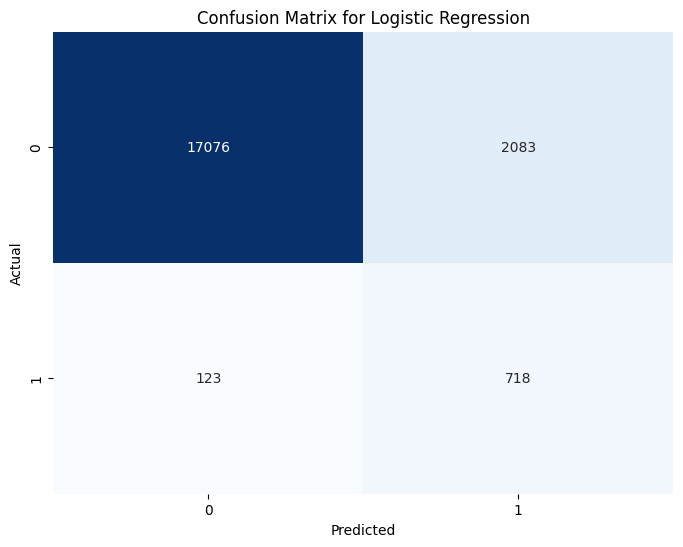

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     19159
           1       0.26      0.85      0.39       841

    accuracy                           0.89     20000
   macro avg       0.62      0.87      0.67     20000
weighted avg       0.96      0.89      0.92     20000

Decision Tree - Accuracy: 0.9724


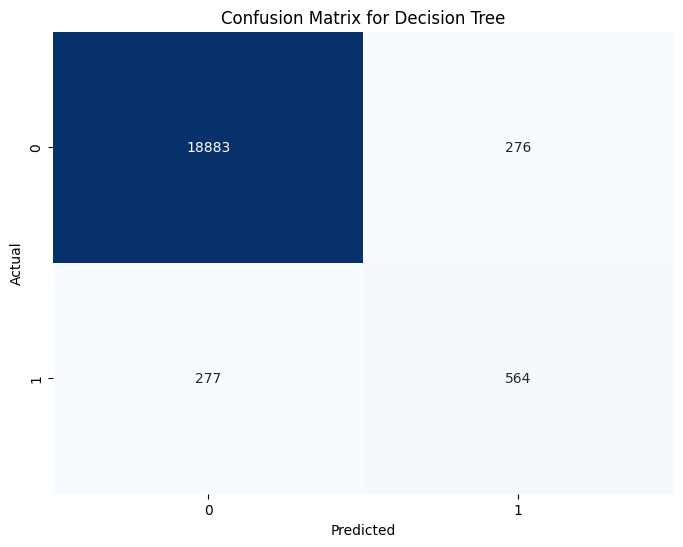

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19159
           1       0.67      0.67      0.67       841

    accuracy                           0.97     20000
   macro avg       0.83      0.83      0.83     20000
weighted avg       0.97      0.97      0.97     20000

Extra Trees - Accuracy: 0.9700


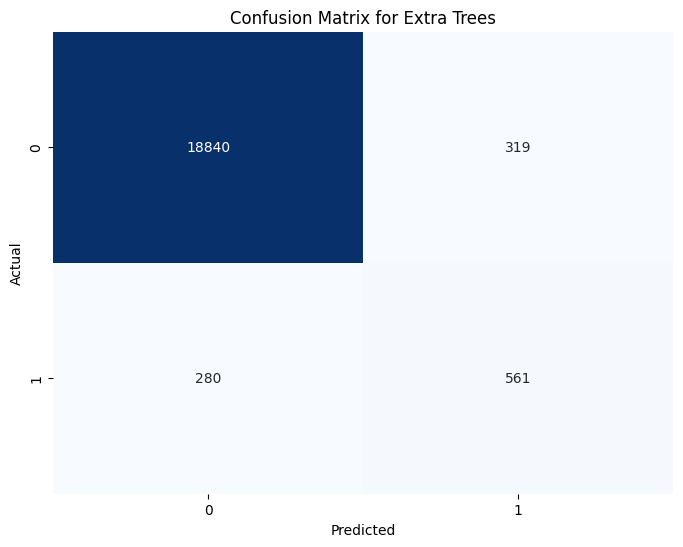

Classification Report for Extra Trees:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     19159
           1       0.64      0.67      0.65       841

    accuracy                           0.97     20000
   macro avg       0.81      0.83      0.82     20000
weighted avg       0.97      0.97      0.97     20000

Random Forest - Accuracy: 0.9712


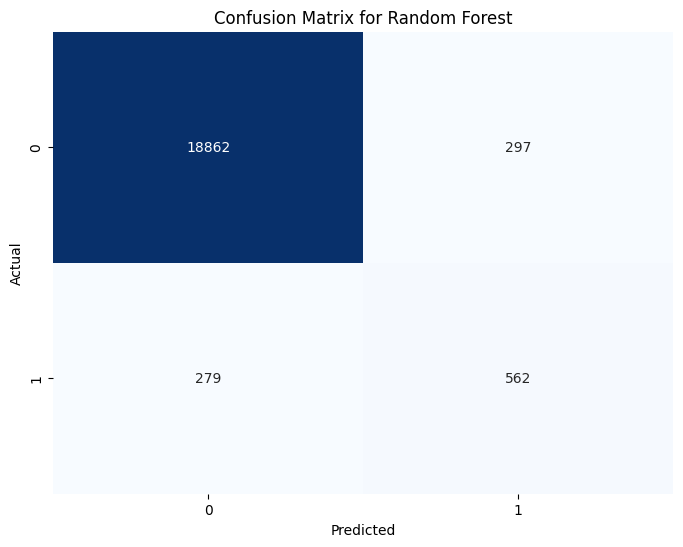

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     19159
           1       0.65      0.67      0.66       841

    accuracy                           0.97     20000
   macro avg       0.82      0.83      0.82     20000
weighted avg       0.97      0.97      0.97     20000

Gradient Boosting - Accuracy: 0.9734


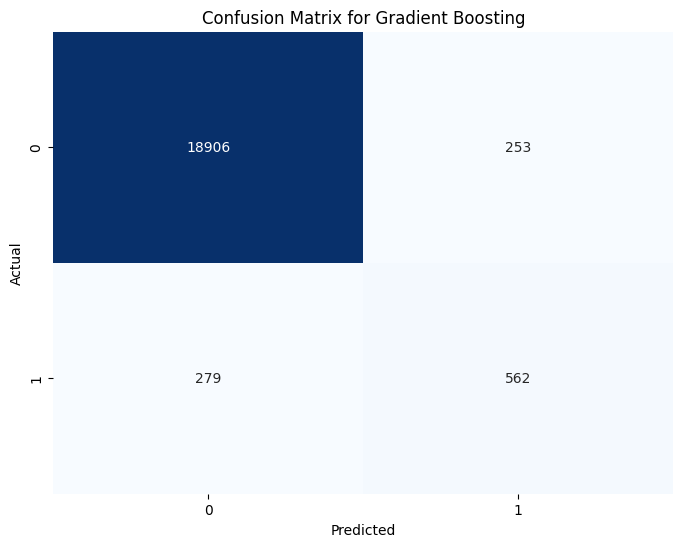

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19159
           1       0.69      0.67      0.68       841

    accuracy                           0.97     20000
   macro avg       0.84      0.83      0.83     20000
weighted avg       0.97      0.97      0.97     20000

SVM - Accuracy: 0.9407


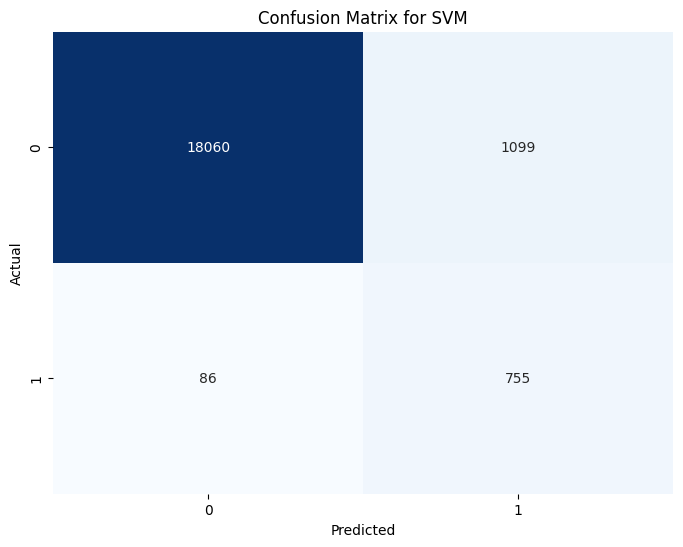

Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     19159
           1       0.41      0.90      0.56       841

    accuracy                           0.94     20000
   macro avg       0.70      0.92      0.76     20000
weighted avg       0.97      0.94      0.95     20000

K-Nearest Neighbors - Accuracy: 0.8771


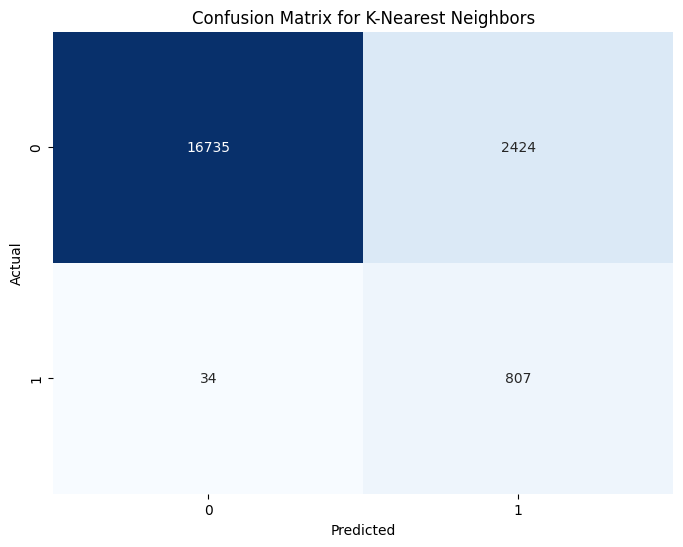

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     19159
           1       0.25      0.96      0.40       841

    accuracy                           0.88     20000
   macro avg       0.62      0.92      0.66     20000
weighted avg       0.97      0.88      0.91     20000

XGBoost - Accuracy: 0.9744


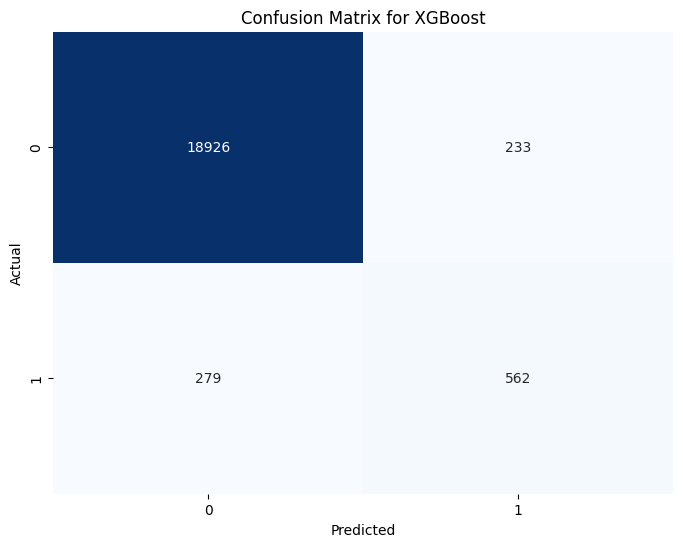

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19159
           1       0.71      0.67      0.69       841

    accuracy                           0.97     20000
   macro avg       0.85      0.83      0.84     20000
weighted avg       0.97      0.97      0.97     20000



In [48]:
# Check for non-numeric columns in x_train_selected
non_numeric_columns = x_train_selected.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)


x_train_selected = pd.get_dummies(x_train_selected, drop_first=True)
x_test_selected = pd.get_dummies(x_test_selected, drop_first=True)

# Align columns in train and test sets
x_train_selected, x_test_selected = x_train_selected.align(x_test_selected, join='left', axis=1, fill_value=0)
for model_name, model in models.items():
    model.fit(x_train_selected, y_train_selected)
    y_pred = model.predict(x_test_selected)

    accuracy = accuracy_score(y_test_selected, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.4f}")

    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test_selected, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test_selected, y_pred))




# Comparing Model Accuracy Before & After Applying Hyperparameter Tuning

In [49]:
from sklearn.model_selection import GridSearchCV

# Decision Tree
model_name = 'Decision Tree'
model = DecisionTreeClassifier()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train_selected, y_train_selected)
tuned_model1 = grid_search.best_estimator_

# Train the best model
tuned_model1.fit(x_train_selected, y_train_selected)
y_pred_tuned = tuned_model1.predict(x_test_selected)

# Calculate accuracy
accuracy_after = accuracy_score(y_test_selected, y_pred_tuned)
print(f"{model_name} - Best Params: {grid_search.best_params_}")
print(f"{model_name} - Accuracy: {accuracy_after:.4f}")


Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Decision Tree - Best Params: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Decision Tree - Accuracy: 0.9692


In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Gradient Boosting
model_name = 'Gradient Boosting'
model = GradientBoostingClassifier()

# Train and evaluate before tuning
model.fit(x_train_selected, y_train_selected)
y_pred = model.predict(x_test_selected)
accuracy_before = accuracy_score(y_test_selected, y_pred)

# Print accuracy before tuning
print(f"{model_name} - Accuracy before tuning: {accuracy_before:.4f}")

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train_selected, y_train_selected)
tuned_model_gradient = grid_search.best_estimator_

# Evaluate after tuning
y_pred_tuned = tuned_model_gradient.predict(x_test_selected)
accuracy_after = accuracy_score(y_test_selected, y_pred_tuned)

# Print accuracy after tuning
print(f"{model_name} - Accuracy after tuning: {accuracy_after:.4f}")


Gradient Boosting - Accuracy before tuning: 0.9734
Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Gradient Boosting - Accuracy after tuning: 0.9748


In [51]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
# XGBoost
model_name = 'XGBoost'
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train_selected, y_train_selected)
tuned_model2 = grid_search.best_estimator_

# Train the best model
tuned_model2.fit(x_train_selected, y_train_selected)
y_pred_tuned = tuned_model2.predict(x_test_selected)

# Calculate accuracy
accuracy_after = accuracy_score(y_test_selected, y_pred_tuned)
print(f"{model_name} - Best Params: {grid_search.best_params_}")
print(f"{model_name} - Accuracy: {accuracy_after:.4f}")


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
XGBoost - Best Params: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
XGBoost - Accuracy: 0.9748
